In [1]:
import csv
import numpy as np
import codecs
import matplotlib.pyplot as plt

In [4]:
#関節角が入ったcsvファイルのフルパス（shift+右クリック→パスのコピー）
file_name = R"C:\Users\Amethyst\Desktop\Controller_Ver.5.0.6\Themes\Sewing_VS\Calibration\data\B\angle_100.csv"

In [5]:
# 画像取得時の手先位置姿勢を読み込む
angle = np.empty((0, 6), dtype=np.float32)
with codecs.open(file_name, "r", 'utf-8-sig') as f: #ここが間違ってないか要確認
    angle_reader = csv.reader(f, delimiter=',')
    for row in angle_reader:
        row = np.expand_dims(row, axis=0)
        angle = np.append(angle, row, axis=0)
    f.close()    
angle = np.asarray(angle , np.float32)
        

In [6]:
#行が各関節に対応するように変形（例：一行目が第一関節）
joint = np.zeros((angle.shape[1], angle.shape[0]), np.float32)
for j in range(angle.shape[1]):
    joint[j][:] = [i[j] for i in angle][:]

In [7]:
#最初の値との差をとった行列を作成
joint_rel = np.empty(joint.shape, np.float32)
for i in range(joint.shape[0]):
    joint_rel[i] = joint[i] - joint[i,0]

In [8]:
#関節角の初期値との差の最大、最小値を表示
for i in range(joint_rel.shape[0]):
    print("j",i,max(joint_rel[i]), min(joint_rel[i]))

j 0 1.219284 -4.59795
j 1 4.7940598 -1.1319447
j 2 3.4043617 -8.135517
j 3 4.302391 -4.775139
j 4 12.91692 -2.1079445
j 5 11.403513 -18.129295


In [9]:
#関節ごとの適当な閾値を設定（あんまりあてにならない）、閾値内に入っているかを表示
error = [0.7, 1.5, 1.5, 2, 5, 6.5]
for i in range(joint_rel.shape[0]):
    ret = np.all(np.abs(joint_rel[i]) < error[i])
    print(i, ret)

0 False
1 False
2 False
3 False
4 False
5 False


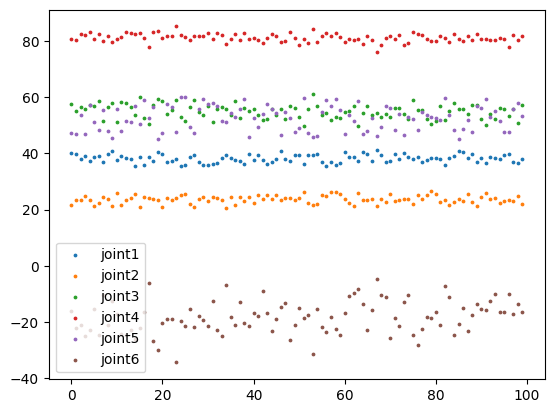

In [10]:
#角関節角を表示
for i in range(joint.shape[0]):
    plt.scatter(range(joint.shape[1]), joint[i], s=3, label=f"joint{i+1}")
plt.legend()
plt.show()